In [1]:
import numpy as np
import pandas as pd
import yfinance as yf 
import ta

In [27]:
# Fetch data
ticker = input("Stock:")  # Replace with your desired stock ticker
data = yf.download(ticker, start="2024-01-01", end="2024-12-31")

# Preview data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             AMD         AMD         AMD         AMD       AMD
Date                                                                
2024-01-02  138.580002  144.399994  137.429993  144.279999  64902000
2024-01-03  135.320007  137.429993  133.740005  135.710007  61988600
2024-01-04  136.009995  137.699997  134.000000  134.300003  58610300
2024-01-05  138.580002  141.009995  136.440002  136.779999  69595000
2024-01-08  146.179993  147.149994  140.149994  140.360001  71756900


In [28]:
data['Close'] = data['Close'].astype(float)  # Ensure it's float

In [29]:
from ta.volatility import BollingerBands
from ta.trend import EMAIndicator

# Ensure 'Close' is a pandas Series and has no NaN values
close_prices = data['Close'].astype(float)

# Calculate Bollinger Bands
bb = BollingerBands(close=close_prices, window=20, window_dev=2)

# Debug: Inspect the shape of the raw attribute
print("Shape of _hband:", bb._hband.shape)



Shape of _hband: (251, 1)


In [30]:
from ta.volatility import BollingerBands

# Ensure 'Close' is a pandas Series and has no NaN values
close_prices = data['Close'].astype(float)

# Calculate Bollinger Bands
bb = BollingerBands(close=close_prices, window=20, window_dev=2)

# Use the internal attributes and flatten them
data['bb_high'] = pd.Series(bb._hband.squeeze(), index=data.index)  # Upper band
data['bb_low'] = pd.Series(bb._lband.squeeze(), index=data.index)   # Lower band
data['bb_middle'] = pd.Series(bb._mavg.squeeze(), index=data.index) # Middle band

# Preview the DataFrame
print(data[['Close', 'bb_high', 'bb_low', 'bb_middle']].head())

Price            Close bb_high bb_low bb_middle
Ticker             AMD                         
Date                                           
2024-01-02  138.580002     NaN    NaN       NaN
2024-01-03  135.320007     NaN    NaN       NaN
2024-01-04  136.009995     NaN    NaN       NaN
2024-01-05  138.580002     NaN    NaN       NaN
2024-01-08  146.179993     NaN    NaN       NaN


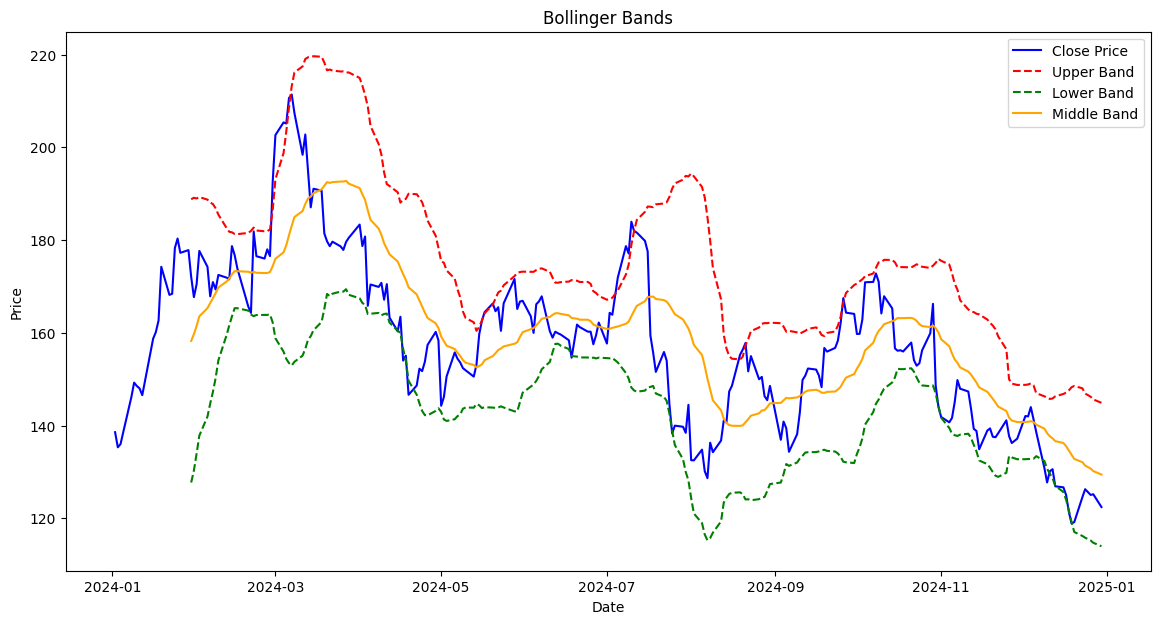

In [31]:
import matplotlib.pyplot as plt

# Plot Close prices and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['bb_high'], label='Upper Band', linestyle='--', color='red')
plt.plot(data.index, data['bb_low'], label='Lower Band', linestyle='--', color='green')
plt.plot(data.index, data['bb_middle'], label='Middle Band', linestyle='-', color='orange')

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
